In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('beng_house.csv')

In [3]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
data.shape

(13320, 9)

In [5]:
data.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
data.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [8]:
from sklearn.impute import SimpleImputer

In [9]:
imputer = SimpleImputer(strategy='mean')
data['bath'] = imputer.fit_transform(data[['bath']])
data['bath'] = data['bath'].astype(int)

In [10]:
data = data.dropna()

In [11]:
data.isna().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [12]:
data['bhk']=data['size'].str.split().str.get(0).astype(int)

In [13]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5,3.0,120.00,4
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3,1.0,95.00,3
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2,1.0,38.00,2
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785,5,3.0,295.00,4


In [14]:
data = data.drop(columns = ['society'])

In [15]:
data['availability'] = data['availability'].apply(lambda x: 0 if x == 'Ready To Move' else 1)

In [16]:
data['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [17]:
data['area_type'] = data['area_type'].replace({'Super built-up  Area':0, 'Plot  Area':1, 'Built-up  Area':2,'Carpet  Area':3})

In [18]:
data = data.drop(columns = ['size','balcony'])

In [19]:
data['location'] = data['location'].str.strip()

In [20]:
location_counts = data['location'].value_counts()
rare_locations = location_counts[location_counts <= 10].index

data['location'] = data['location'].apply(lambda x: 'Other' if x in rare_locations else x)


In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['location'] = le.fit_transform(data['location'])



In [22]:
data.head()

,area_type,availability,location,total_sqft,bath,price,bhk
0,0,1,45,1056,2,39.07,2
1,1,0,35,2600,5,120.00,4
3,0,0,100,1521,3,95.00,3
5,0,0,140,1170,2,38.00,2
11,1,0,140,2785,5,295.00,4


In [23]:
data.shape

(7496, 7)

In [24]:
data.isna().sum()

area_type       0
availability    0
location        0
total_sqft      0
bath            0
price           0
bhk             0
dtype: int64

In [25]:
def convert(x):
    temp = x.split('-')
    if(len(temp)==2):
        return (float(temp[0]) + float(temp[1]))/2
    try:
        return float(x)
    except:
        None

In [26]:
data['total_sqft'] = data['total_sqft'].apply(convert)

In [27]:
data.isna().sum()

area_type        0
availability     0
location         0
total_sqft      15
bath             0
price            0
bhk              0
dtype: int64

In [28]:
data.dropna(subset = ['total_sqft'],inplace = True)

In [29]:
data.head()

,area_type,availability,location,total_sqft,bath,price,bhk
0,0,1,45,1056.0,2,39.07,2
1,1,0,35,2600.0,5,120.00,4
3,0,0,100,1521.0,3,95.00,3
5,0,0,140,1170.0,2,38.00,2
11,1,0,140,2785.0,5,295.00,4


In [30]:
data['price_per_sqft'] = data['price'] * 100000 / data['total_sqft']

In [31]:
data.isna().sum()

area_type         0
availability      0
location          0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

<Axes: >

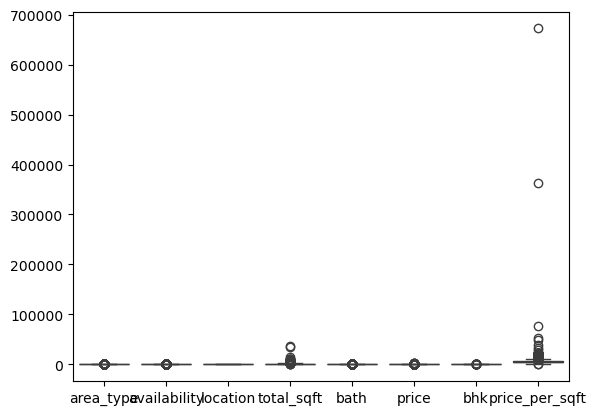

In [32]:
sns.boxplot(data)

In [33]:
from scipy import stats
zscore = np.abs(stats.zscore(data))

In [34]:
data = data[(zscore < 3)]

<Axes: ylabel='price'>

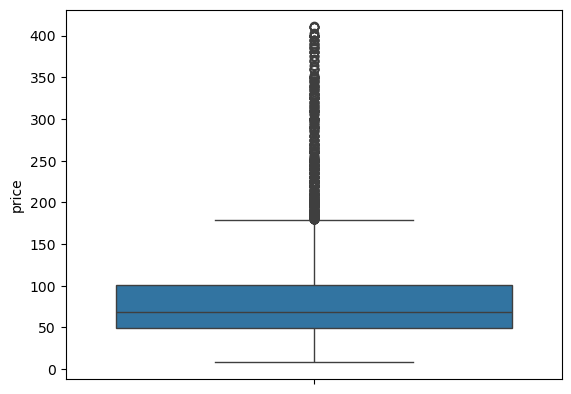

In [35]:
sns.boxplot(data['price'])

In [36]:
data.isna().sum()

area_type          51
availability        0
location            0
total_sqft         84
bath               80
price             127
bhk                34
price_per_sqft      6
dtype: int64

In [38]:


imputer = SimpleImputer(strategy = 'mean')
data['bhk'] = imputer.fit_transform(data[['bath']])
data['area_type'] = data['area_type'].fillna(0)
data['bath'] = data['bath'].fillna(2.0)
data = data.dropna()

In [39]:
data['bath'].value_counts()

bath
2.0    4329
3.0    2029
1.0     427
4.0     397
5.0     139
Name: count, dtype: int64

In [40]:
data.isna().sum()

area_type         0
availability      0
location          0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [41]:
x = data.drop(columns = ['price','price_per_sqft'])
y = data['price']

In [42]:
x.isna().sum()

area_type       0
availability    0
location        0
total_sqft      0
bath            0
bhk             0
dtype: int64

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 1)

In [44]:
x_train.shape

(5856, 6)

In [45]:
x_test.shape

(1465, 6)

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [47]:
lr = LinearRegression()
lr.fit(x_train,y_train)

rf = RandomForestRegressor()
rf.fit(x_train,y_train)

gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)

xgb = XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [48]:
y_pred1 = lr.predict(x_test)
y_pred2 = rf.predict(x_test)
y_pred3 = gb.predict(x_test)
y_pred4 = xgb.predict(x_test)

In [49]:
from sklearn import metrics

In [50]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)

In [51]:
print(score1,score2,score3,score4)

0.7344482593535009 0.799533737797896 0.8055535139304475 0.8306569392060597


Text(0.5, 1.0, 'Actual vs Predicted')

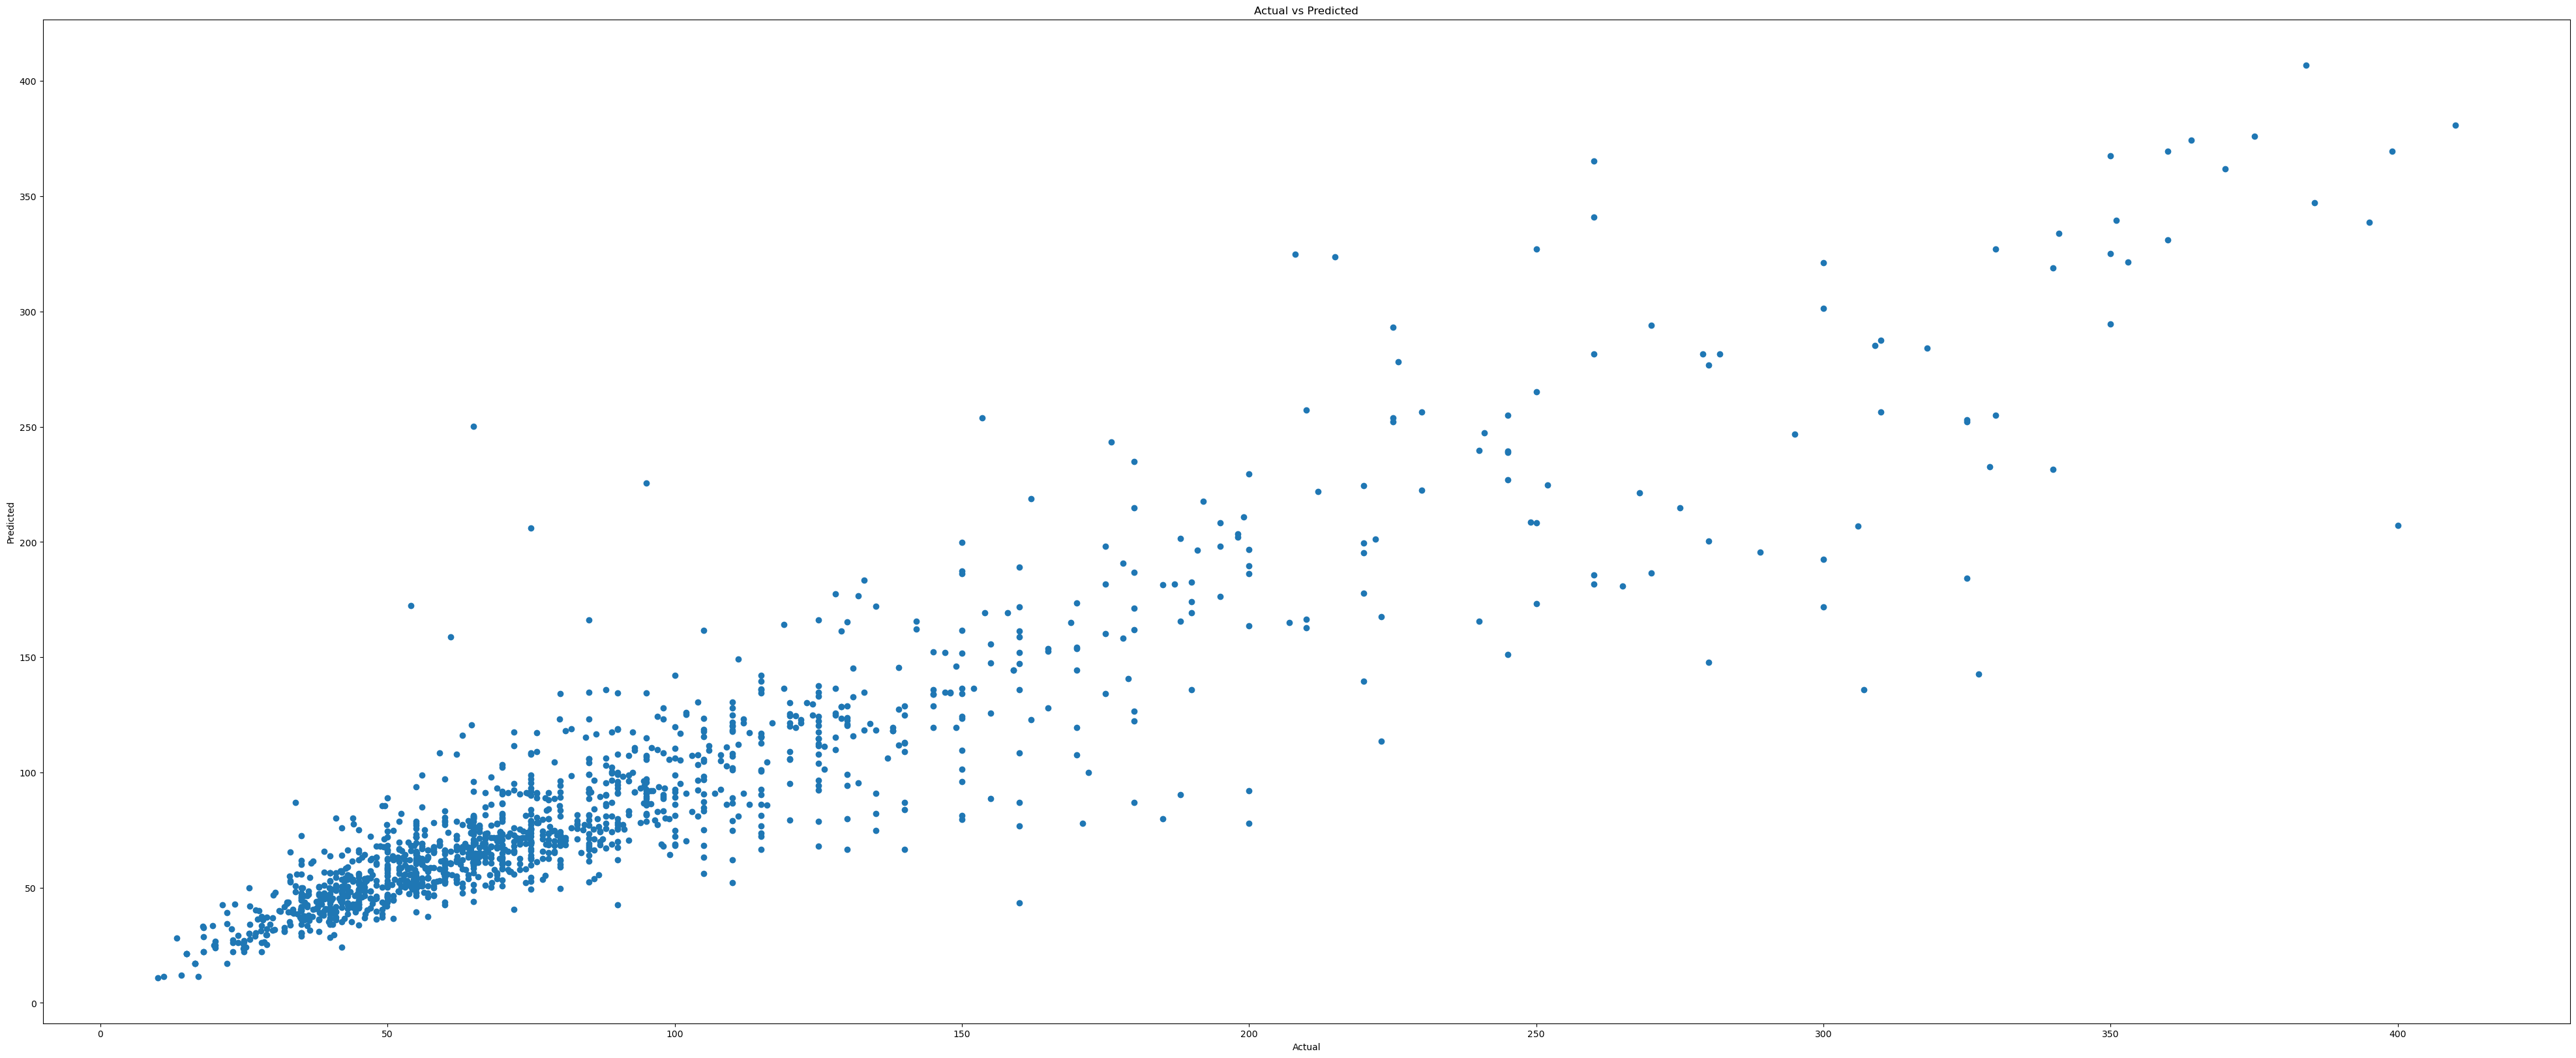

In [52]:
plt.figure(figsize = (50,20))
plt.scatter(y_test, y_pred4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")

In [53]:
final = pd.DataFrame({
    'Model': ['lr', 'rf', 'gb', 'xgb'],
    'R2_Score': [score1, score2, score3, score4]
})


In [54]:
final

,Model,R2_Score
0,lr,0.734448
1,rf,0.799534
2,gb,0.805554
3,xgb,0.830657


<Axes: xlabel='Model', ylabel='R2_Score'>

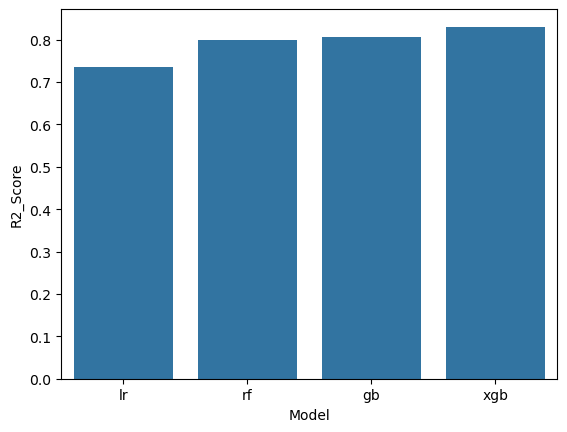

In [55]:
sns.barplot(x=final['Model'], y=final['R2_Score'])

In [56]:
import joblib

In [57]:
xgb = XGBRegressor()
model = xgb.fit(x,y)

In [58]:
joblib.dump(model,'house_price_prediction')

['house_price_prediction']

In [59]:
joblib.load('house_price_prediction')

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [60]:
new = pd.DataFrame({
    'area_type':1,
    'availability':0,
    'location':35,
    'total_sqft':2600,
    'bath':5.0,
    'bhk':5.0
},index=[0])

In [61]:
model.predict(new)

array([126.7661], dtype=float32)

In [62]:
data.head()

,area_type,availability,location,total_sqft,bath,price,bhk,price_per_sqft
0,0.0,1,45,1056.0,2.0,39.07,2.0,3699.810606
1,1.0,0,35,2600.0,5.0,120.00,5.0,4615.384615
3,0.0,0,100,1521.0,3.0,95.00,3.0,6245.890861
5,0.0,0,140,1170.0,2.0,38.00,2.0,3247.863248
11,1.0,0,140,2785.0,5.0,295.00,5.0,10592.459605
